In [1]:
import numpy as np

In [6]:
def inner_product(a, b):
    import copy
    
    a = copy.deepcopy(list(a))
    b = copy.deepcopy(list(b))
    
    return sum([i * j for i, j in zip(a, b)])

In [5]:
x = [1, 2, 3]
y = [3, 2, 1]

np.inner(x, y)

10

In [8]:
inner_product(x, y)

10

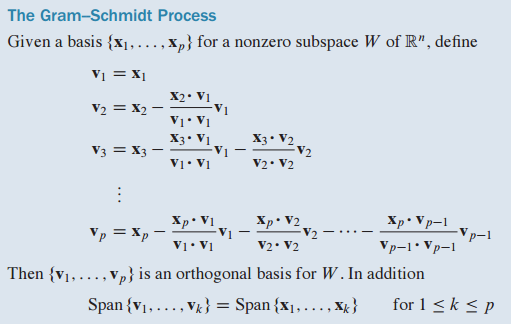

In [32]:
def transpose(A):
    """
    A^T
    """
    import copy
    
    A = copy.deepcopy(A)
    if isinstance(A, np.ndarray):
        A = A.tolist()

    nrows = len(A)
    ncols = len(A[0])
    
    AT = []
    for j in range(ncols):
        AT_row = []
        
        for i in range(nrows):
            AT_row.append(A[i][j])
            
        AT.append(AT_row)
        
    return AT

def normalize(a):
    square_sum = 0
    for i in a:
        square_sum += i ** 2
    square_sum **= 0.5
    
    return [i / square_sum for i in a]


def orthogonal_basis(X):
    Xt = transpose(X)
    
    Vt = [Xt[0]]
    
    for i, xi in enumerate(Xt[1:], start=1):
        vi = xi[:]
        for vj in Vt:
            coef = inner_product(xi, vj) / inner_product(vj, vj)
            vi = [vii - coef * vji for vii, vji in zip(vi, vj)]
        Vt.append(vi)
        
    Vt = [normalize(vt) for vt in Vt]
            
    return transpose(Vt)

In [35]:
A = [[1, 0, 1], [0, 1, 1], [1, 2, 0]]

orthogonal_basis(A)

[[0.7071067811865475, -0.5773502691896258, 0.4082482904638631],
 [0.0, 0.5773502691896258, 0.8164965809277261],
 [0.7071067811865475, 0.5773502691896258, -0.4082482904638631]]

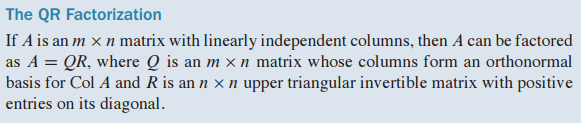


In [36]:
def multiple_matrix(A, b):
    """
    A: m x n matrix
    b: n x k matrix
    """
    import copy
    
    X = copy.deepcopy(A)
    y = copy.deepcopy(b)
    
    if isinstance(X, np.ndarray):
        X = X.tolist()
    
    if isinstance(y, np.ndarray):
        y = y.tolist()
        
    ncols = len(X[0])
    nrows = len(y)
    
    assert ncols == nrows
    
    Z = []
    
    if not isinstance(y[0], list): # k = 1
        for row in X:
            element = 0
            for j in range(ncols):
                element += row[j] * y[j]
            
            Z.append(element)
        
        return Z
    
    
    for i, row in enumerate(X):
        zrow = []
        for k in range(len(y[0])):
            element = 0
            
            for j in range(ncols):
                element += row[j] * y[j][k]
                
            zrow.append(element)
            
        Z.append(zrow)
        
    return Z

In [37]:
def qr_decomposition(A):
    import copy
    A = copy.deepcopy(A)
    
    Q = orthogonal_basis(A)
    Qt = transpose(Q)
    R = multiple_matrix(Qt, A)
    return Q, R

In [39]:
Q, R = qr_decomposition(A)

In [40]:
Q

[[0.7071067811865475, -0.5773502691896258, 0.4082482904638631],
 [0.0, 0.5773502691896258, 0.8164965809277261],
 [0.7071067811865475, 0.5773502691896258, -0.4082482904638631]]

In [41]:
R

[[1.414213562373095, 1.414213562373095, 0.7071067811865475],
 [0.0, 1.7320508075688776, 0.0],
 [0.0, 0.0, 1.2247448713915892]]

In [48]:
Q, R = np.linalg.qr(A)

In [49]:
Q

array([[-0.70710678,  0.57735027, -0.40824829],
       [-0.        , -0.57735027, -0.81649658],
       [-0.70710678, -0.57735027,  0.40824829]])

In [50]:
R

array([[-1.41421356, -1.41421356, -0.70710678],
       [ 0.        , -1.73205081,  0.        ],
       [ 0.        ,  0.        , -1.22474487]])

In [45]:
B = [[1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 1, 1]]

Q, R = qr_decomposition(B)

In [46]:
Q

[[0.5, -0.8660254037844387, 0.0],
 [0.5, 0.2886751345948129, -0.816496580927726],
 [0.5, 0.2886751345948129, 0.4082482904638631],
 [0.5, 0.2886751345948129, 0.4082482904638631]]

In [47]:
R

[[2.0, 1.5, 1.0],
 [1.1102230246251565e-16, 0.8660254037844388, 0.5773502691896258],
 [1.1102230246251565e-16, 1.1102230246251565e-16, 0.8164965809277261]]

In [51]:
Q, R = np.linalg.qr(B)

In [52]:
Q

array([[-0.5       ,  0.8660254 ,  0.        ],
       [-0.5       , -0.28867513,  0.81649658],
       [-0.5       , -0.28867513, -0.40824829],
       [-0.5       , -0.28867513, -0.40824829]])

In [53]:
R

array([[-2.        , -1.5       , -1.        ],
       [ 0.        , -0.8660254 , -0.57735027],
       [ 0.        ,  0.        , -0.81649658]])